In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/height-weight.csv")

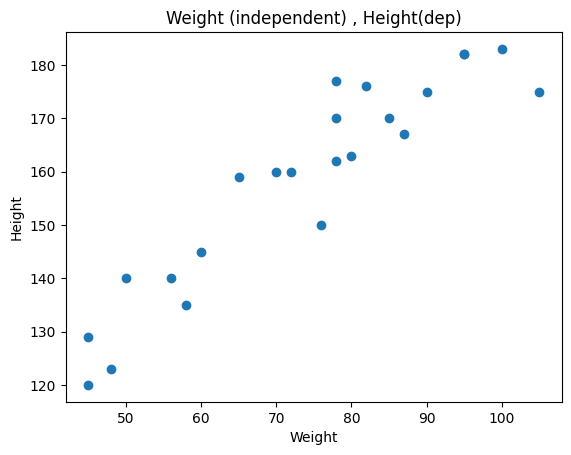

In [3]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight (independent) , Height(dep)");

In [4]:
# divide our dataset into indepndent and dependent features
X= df[["Weight"]] # indep feat
y = df["Height"] #dept feat

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform (X_train)
X_test = scaler.transform(X_test)

In [11]:
# train the simple linear regression
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
print("The slope or coefficient of weight is", regressor.coef_)
print("The intercept is", regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
The intercept is 157.5


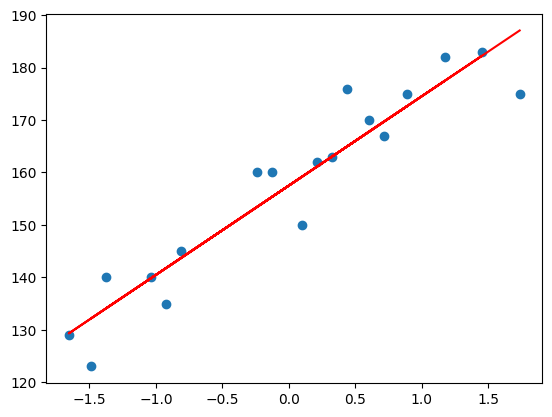

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

In [16]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

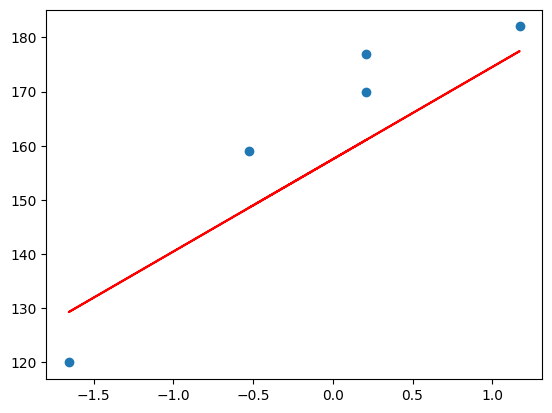

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [20]:
# performance metrics

#MSE,MAE,RMSE
#R square and adjusted R square

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

109.77592599051664 9.822657814519232 10.477400726827081


R^2 = 1-SSR/SST

R^2 = coefficeint of determination SSR = sum of square of resuiduals SST = total sum of square

In [26]:
 from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score) # accurecy of model

0.776986986042344


Adjusted R Square

Adj R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]

where:

R2 : the R2 of model

n : The number of observation

K : the number of predictor variables

In [27]:
# adj R ^2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [28]:
# new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [33]:
print("The height prediction for weight 80 kg is:",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is: [163.01076266]


Assumption:


1) plot a scatter plot for the prediction.

The scatter plot will be linearly distributed

2) Residuals

3) scatter plot with respect to prediction and residuals

uniform distribution